In [ ]:
#A GUI window asks you for a keyword and sample size and analyses the sentiment of tweets about
#the keyword in a scatterplot. 
#from a github

In [ ]:
import tweepy
from tkinter import *
from time import sleep
from datetime import datetime
from textblob import TextBlob
import matplotlib.pyplot as plt


In [14]:
#Authentication

access_token = ''
access_secret = ''
consumer_key = ''
consumer_secret = ''


In [15]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)


In [16]:
#GUI
root = Tk()

label1 = Label(root, text="Search")
E1 = Entry(root, bd =5)

label2 = Label(root, text="Sample Size")
E2 = Entry(root, bd =5)



In [8]:
def getE1():
    return E1.get()

def getE2():
    return E2.get()

In [17]:
def getData():
    getE1()
    keyword = getE1()

    getE2()
    numberOfTweets = getE2()
    numberOfTweets = int(numberOfTweets)

    #Where the tweets are stored to be plotted
    polarity_list = []
    numbers_list = []
    number = 1

    for tweet in tweepy.Cursor(api.search, keyword, lang="en").items(numberOfTweets):
        try:
            analysis = TextBlob(tweet.text)
            analysis = analysis.sentiment
            polarity = analysis.polarity
            polarity_list.append(polarity)
            numbers_list.append(number)
            number = number + 1

        except tweepy.TweepError as e:
            print(e.reason)

        except StopIteration:
            break

    #Plotting
    axes = plt.gca()
    axes.set_ylim([-1, 2])

    plt.scatter(numbers_list, polarity_list)

    averagePolarity = (sum(polarity_list))/(len(polarity_list))
    averagePolarity = "{0:.0f}%".format(averagePolarity * 100)
    time  = datetime.now().strftime("At: %H:%M\nOn: %m-%d-%y")

    plt.text(0, 1.25, "Average Sentiment:  " + str(averagePolarity) + "\n" + time, fontsize=12, bbox = dict(facecolor='none', edgecolor='black', boxstyle='square, pad = 1'))

    plt.title("Sentiment of " + keyword + " on Twitter")
    plt.xlabel("Number of Tweets")
    plt.ylabel("Sentiment")
    plt.show()


In [18]:
submit = Button(root, text ="Submit", command = getData)

label1.pack()
E1.pack()
label2.pack()
E2.pack()
submit.pack(side =BOTTOM)


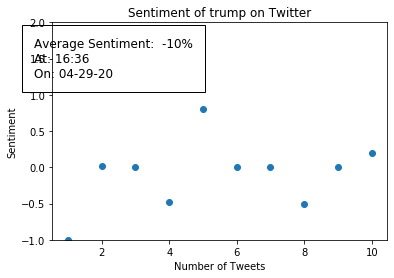

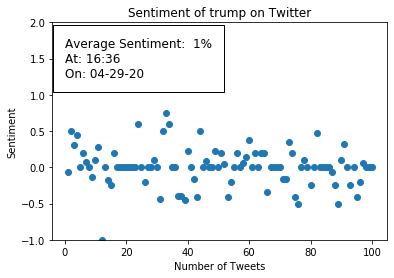

In [ ]:
root.mainloop()